<a href="https://colab.research.google.com/github/Nkeeydata/car_Prediction_Challenge/blob/main/D_S_NChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DSN HACKANTHON CHALLENGE FOR AI BOOTCAMP 2025

### Used Car Prediction

### INTRODUCTION

Seeing that the prices of new branded cars are on the high side due to changes in my country's economy, I decided to go for fairly used cars. So this project is to build a model that could be used to predict the prices of used cars to enable knowing the features that affects the prices of cars before micro shopping. The datasets was gotten and downloaded from ```kaggle```, and it comprises of the ```train datasets```, the ```test datasets```, and the ```submission datasets``` which will act as our format for the final submission.

### COLUMN DESCRIPTION

```Transmission``` refers to whether your car has a manual or automatic gear.

```Accident``` refers to whether the car has collided with another vehicle or something else. Previous accidents can significantly impact a car's value, even if repairs were done well.

```Brand``` refers to the make of the car. That is, the manufacturer's or company name. Some brands are known for reliability and longevity, which helps them maintain higher resale values. For example, Toyota

```model_year``` refers to the year the car was produced. The price of a car diminishes with time and its usage. Aspects include car models, variants, supply and demand, and price

```Mileage``` is the distance travelled by the car since produced. Usually cars with higher mileage will have a reduced value on the basis that they have been used more and likely to experience wear and.

```Model``` is the name of a car product or a line of cars. Example, camry

```Fuel_type``` is responsible for the fuel rate consumption of the car. it is a type of engine

```engine``` is the machine that powers the car, and it can be grouped according to ```fuel_type```

### IMPORTATION OF LIBRARIES

In [ ]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.5 MB 438.1 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.5 MB 438.1 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.5 MB 438.1 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.5 MB 438.1 kB/s eta 0:00:04
   ------ --------------------------------- 0.2/1.5 MB 529.7 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.5 MB 529.7 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.5 MB 529.7 kB/s eta 0:00:03
   ------- -------------------------------- 0.3/1.5 MB 450.1 kB/s eta 0:00:03
   ----------- ----------------

In [ ]:
import pandas as pd
import numpy as np

# visualizations

import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMRegressor
import gc
from sklearn.impute import SimpleImputer
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder



### Importation of Datasets

In [ ]:
df_train = pd.read_csv('train12.csv')
df_test = pd.read_csv('test12.csv')
df_sub = pd.read_csv('sample_submission12.csv')

In [ ]:
# Duplicating my train and test datasets

df_trn = df_train.copy()
df_tst = df_test.copy()

### DATA EXPLORATION

In [ ]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [ ]:
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [ ]:
print("Train Shape:", df_train.shape)
print("Test Shape:", df_test.shape)

Train Shape: (188533, 13)
Test Shape: (125690, 12)


In [ ]:
df_train.info() # confirming the datatype of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [ ]:
df_train.isna().sum() # confirming the total number of null values in train set

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [ ]:
df_test.isna().sum() #confirming the total null values in test set

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [ ]:
df_train.duplicated() #checking for duplicates in train datasets

0         False
1         False
2         False
3         False
4         False
          ...  
188528    False
188529    False
188530    False
188531    False
188532    False
Length: 188533, dtype: bool

In [ ]:
df_test.duplicated() # checking duplicates in test datasets

0         False
1         False
2         False
3         False
4         False
          ...  
125685    False
125686    False
125687    False
125688    False
125689    False
Length: 125690, dtype: bool

In [ ]:
df_train.describe().T #viewing our statistics in a transpose pattern

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


#### From the above exploration, we noticed null values in ```fuel_type```, ```clean-title```, and ```accident```

### Data Preprocessing

#### Removal of Outliers from the train set

In [ ]:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

df_train_no_outliers = remove_outliers_iqr(df_train, 'milage')
df_train_no_outliers = remove_outliers_iqr(df_train_no_outliers, 'price')
df_train_no_outliers.reset_index(drop=True, inplace=True)

#### Removal of Outliers from the test set

In [ ]:
df_test_no_outliers = remove_outliers_iqr(df_test, 'milage')
df_test_no_outliers.reset_index(drop=True, inplace=True)

### Processing the ```Fuel_type``` Feature

In [ ]:
df_train["fuel_type"].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [ ]:
df_train['fuel_type'] = df_train['fuel_type'].replace(['–', 'not supported'], 'Not defined')

df_train.fillna({'fuel_type':'Not defined'}, inplace=True)

df_train["fuel_type"].unique()



df_test['fuel_type'] = df_test['fuel_type'].replace(['–', 'not supported'], 'Not defined')

df_test.fillna({'fuel_type':'Not defined'}, inplace=True)

df_test["fuel_type"].unique()

array(['Gasoline', 'Hybrid', 'Diesel', 'E85 Flex Fuel', 'Not defined',
       'Plug-In Hybrid'], dtype=object)

In [ ]:
df_test['fuel_type'].value_counts()

fuel_type
Gasoline          110533
Hybrid              4676
Not defined         3935
E85 Flex Fuel       3523
Diesel              2686
Plug-In Hybrid       337
Name: count, dtype: int64

### Processing of the ```Clean_title``` Feature

In [ ]:
df_train['clean_title'].value_counts()

clean_title
Yes    167114
Name: count, dtype: int64

In [ ]:
df_train.fillna({'clean_title':'No'}, inplace=True)


df_test.fillna({'clean_title':'No'}, inplace=True)


In [ ]:
df_train['clean_title'] = df_train['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)

df_test['clean_title'] = df_test['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)

### Processing of the ```accident``` Feature

In [ ]:
print(df_train['accident'].value_counts())

accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64


In [ ]:
df_train.fillna({'accident':'None reported'}, inplace=True)



df_test.fillna({'accident':'None reported'}, inplace=True)


In [ ]:
df_train['accident'] = df_train['accident'].apply(lambda x: 1 if x == 'At least 1 accident or damage reported' else 0)


df_test['accident'] = df_test['accident'].apply(lambda x: 1 if x == 'At least 1 accident or damage reported' else 0)


### Processing the ```model_year``` Feature

In [ ]:
current_year = datetime.now().year


df_train['vehicle_age'] = current_year - df_train['model_year']


df_test['vehicle_age'] = current_year - df_test['model_year']


### Processing of the ```brand``` Feature

In [ ]:
luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Lexus', 'Tesla']
df_train['is_automatic'] = df_train['transmission'].apply(lambda x: 1 if x == 'Automatic' else 0)

df_train['is_luxury_brand'] = df_train['brand'].apply(lambda x: 1 if x in luxury_brands else 0)
df_train['luxury_brand_and_auto'] = df_train['is_luxury_brand'] * df_train['is_automatic']
df_train['clean_title_milage_accident'] = df_train['clean_title'] * df_train['milage'] * df_train['accident']


df_test['is_automatic'] = df_test['transmission'].apply(lambda x: 1 if x == 'Automatic' else 0)

df_test['is_luxury_brand'] = df_test['brand'].apply(lambda x: 1 if x in luxury_brands else 0)
df_test['luxury_brand_and_auto'] = df_test['is_luxury_brand'] * df_test['is_automatic']
df_test['clean_title_milage_accident'] = df_test['clean_title'] * df_test['milage'] * df_test['accident']

In [ ]:
df_test.isna().sum()

id                             0
brand                          0
model                          0
model_year                     0
milage                         0
fuel_type                      0
engine                         0
transmission                   0
ext_col                        0
int_col                        0
accident                       0
clean_title                    0
vehicle_age                    0
is_automatic                   0
is_luxury_brand                0
luxury_brand_and_auto          0
clean_title_milage_accident    0
dtype: int64

In [ ]:
df_train.isna().sum()

id                             0
brand                          0
model                          0
model_year                     0
milage                         0
fuel_type                      0
engine                         0
transmission                   0
ext_col                        0
int_col                        0
accident                       0
clean_title                    0
price                          0
vehicle_age                    0
is_automatic                   0
is_luxury_brand                0
luxury_brand_and_auto          0
clean_title_milage_accident    0
dtype: int64

#### DROPPING OF UNNEEDED COLUMNS/FEATURES

###  The ```ext_col``` and ```int_col``` in additrion to the ```id``` will be dropped

#### looking at the graph below, you will agree with me that both the exterior and interior color can be dropped as the features are too much and not positively correlated that much. Also, the color is important for some customers, but its not the main focus before used car acquisition. Due to the above, I will be dropping the both columns from our dataset to enable the model focus on more important features.

In [ ]:
df_train = df_train.drop(['id', 'ext_col', 'int_col'], axis=1)
df_test = df_test.drop(['id', 'ext_col', 'int_col'], axis=1)

In [ ]:
df_train.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'accident', 'clean_title', 'price', 'vehicle_age',
       'is_automatic', 'is_luxury_brand', 'luxury_brand_and_auto',
       'clean_title_milage_accident'],
      dtype='object')

### DATA VISUALIZATION

([0], [Text(0, 0, '')])

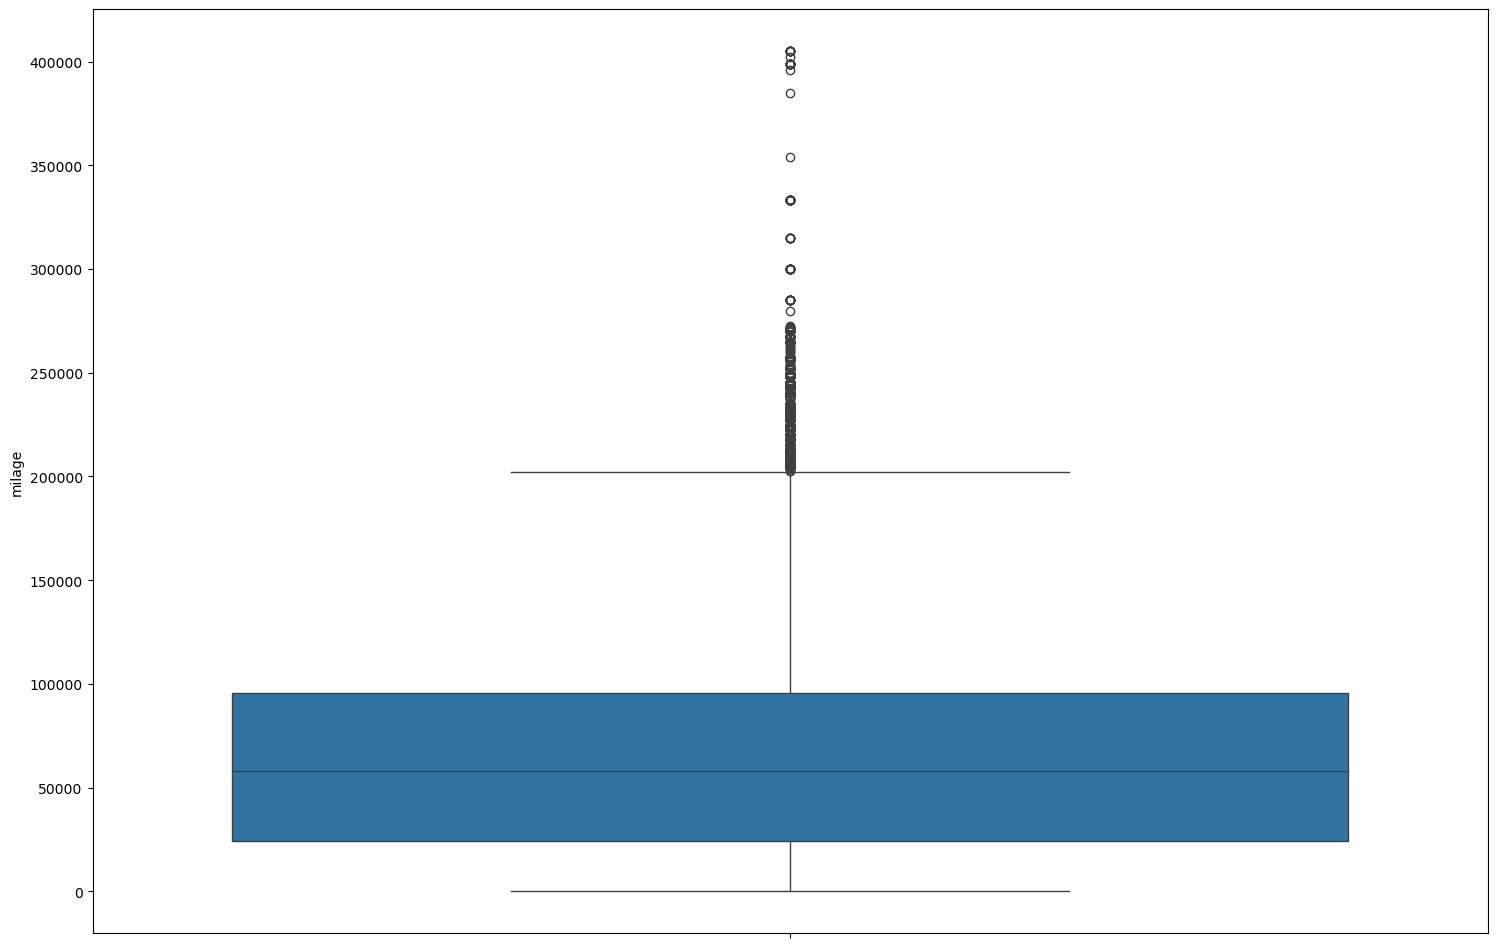

In [ ]:
# this reviews the outliers in the model feature

plt.figure(figsize=(18, 12))
sns.boxplot( data=df_train['milage'])
plt.xticks(rotation=90)

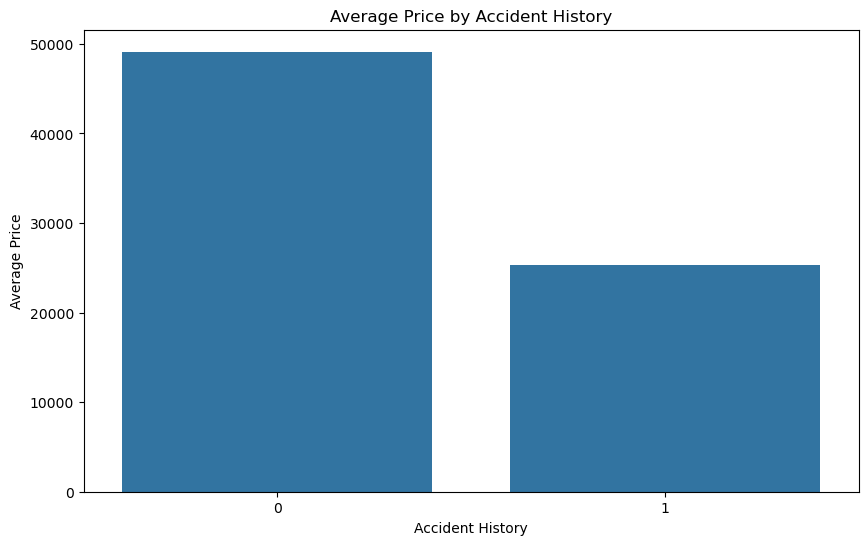

In [ ]:
# plotting the average price against accident. 0:no-accident, 1:Accident reported

plt.figure(figsize=(10, 6))
sns.barplot(x='accident', y='price', data=df_train, errorbar=None)
plt.title('Average Price by Accident History')
plt.xlabel('Accident History')
plt.ylabel('Average Price')

plt.show()

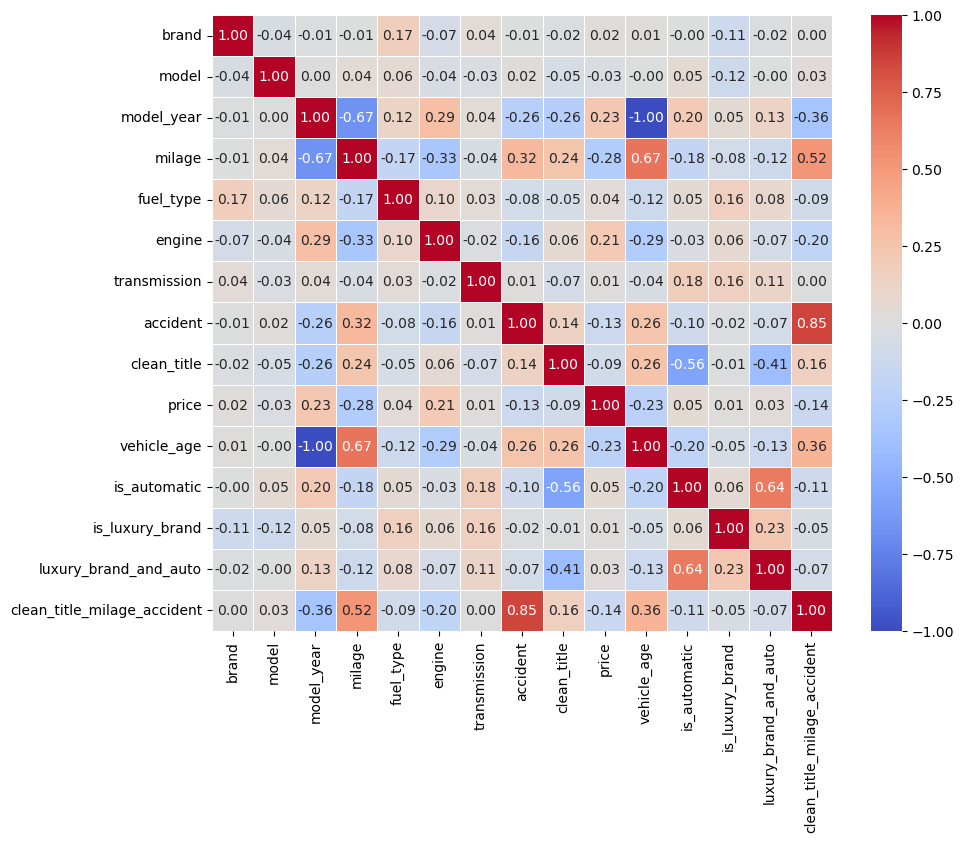

In [ ]:
df_encoded = df_train.copy()
label_encoder = LabelEncoder()

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':  # Check if the column is of object type
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column].astype(str))

# Plot the heatmap with the encoded DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

### DATA TRANSFORMATION

### Performing MinMax on ```Milage``` Feature

In [ ]:
'''
min_max = MinMaxScaler()
##train data :
df_train['milage'] =  (min_max.fit_transform(df_train['milage'].values.reshape(-1, 1)))
## test data :
df_test['milage'] =(min_max.fit_transform(df_test['milage'].values.reshape(-1, 1)))
'''

"\nmin_max = MinMaxScaler()\n##train data :\ndf_train['milage'] =  (min_max.fit_transform(df_train['milage'].values.reshape(-1, 1)))\n## test data :\ndf_test['milage'] =(min_max.fit_transform(df_test['milage'].values.reshape(-1, 1)))\n"

In [ ]:
def knn_impute(df, n_neighbors=5):
    df_encoded = df.copy()
    for col in df_encoded.select_dtypes(include='object').columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_encoded), columns=df_encoded.columns)
    for col in df.select_dtypes(include='object').columns:
        df_imputed[col] = df_imputed[col].round().astype(int).map(
            dict(enumerate(df[col].astype('category').cat.categories)))
    return df_imputed

In [ ]:
df_train_imputed = knn_impute(df_train, n_neighbors=25)
df_test_imputed = knn_impute(df_test, n_neighbors=25)


In [ ]:
cat_cols_train = df_train_imputed.select_dtypes(include=['object']).columns
cat_cols_train = cat_cols_train[cat_cols_train != 'class']
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df_train_imputed[cat_cols_train] = ordinal_encoder.fit_transform(df_train_imputed[cat_cols_train].astype(str))
df_test_imputed[cat_cols_train] = ordinal_encoder.transform(df_test_imputed[cat_cols_train].astype(str))

In [ ]:
X = df_train_imputed.drop(['price'],axis=1)
y = df_train_imputed['price']

### LIGHTGBM HYPERPARAMETER

In [ ]:

###
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(X)
scaled_test_data = scaler.transform(df_test_imputed)
###
n_splits = 6
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

lgb_params={
                'num_leaves': 426,
                 'max_depth': 20,
                 'learning_rate': 0.0113531783529,
                 'n_estimators': 10000,
                 'metric': 'rmse',
                 'subsample': 0.57725522019,
                 'colsample_bytree': 0.91648654301,
                 'reg_alpha': 1.486990880e-06,
                 'reg_lambda': 0.415394585434,
                 'min_data_in_leaf': 73,
                 'feature_fraction': 0.7516736551,
                 'bagging_fraction': 0.51204153915,
                 'bagging_freq': 2,
                 'random_state': 42,
                 'min_child_weight': 0.0172363623834,
                 'cat_smooth': 54.813174077,
                 'verbose' : -1,
                 'early_stopping_rounds': 200,
}

In [ ]:
lgbm_predictions = np.zeros(len(scaled_train_data))
lgbm_true_labels = np.zeros(len(scaled_train_data))
lgbm_test_predictions = np.zeros(len(scaled_test_data))


for fold, (train_idx, val_idx) in enumerate(kf.split(scaled_train_data, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")

    X_train, X_val = scaled_train_data[train_idx], scaled_train_data[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    lgbm_model = LGBMRegressor(**lgb_params)

    lgbm_model.fit(X_train, y_train,
                   eval_set=[(X_val, y_val)],
                   eval_metric='rmse',
                   #early_stopping_rounds=10,
                   #verbose=False
                  )

Training fold 1/6...
Training fold 2/6...
Training fold 3/6...
Training fold 4/6...
Training fold 5/6...
Training fold 6/6...


In [ ]:
lgbm_fold_preds = lgbm_model.predict(X_val)
lgbm_fold_test_preds = lgbm_model.predict(scaled_test_data)

lgbm_predictions[val_idx] = lgbm_fold_preds
lgbm_true_labels[val_idx] = y_val
lgbm_test_predictions += lgbm_fold_test_preds / n_splits
fold_rmse = np.sqrt(mean_squared_error(y_val, lgbm_fold_preds))
print(f"Fold {fold + 1} RMSE: {fold_rmse:.4f}")

Fold 6 RMSE: 79008.0238


In [ ]:
overall_rmse_lgbm = np.sqrt(mean_squared_error(lgbm_true_labels, lgbm_predictions))
print(f"Overall RMSE (LGBMRegressor): {overall_rmse_lgbm:.4f}")

Overall RMSE (LGBMRegressor): 32254.8051


### XGBOOST HYPERPARAMETERS

In [ ]:
xgb_params={
     'lambda': 0.03880258557285165,
     'alpha': 0.02129832295514386,
     'colsample_bytree': 0.4,
     'subsample': 0.7,
     'learning_rate': 0.014,
     'max_depth': 17,
     'random_state': 2020,
     'min_child_weight': 85,
     'n_estimators': 10000,
     'early_stopping_rounds': 200,
#      'tree_method': 'gpu_hist'

}

In [ ]:
n_splits = 6
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

xgb_predictions = np.zeros(len(scaled_train_data))
xgb_true_labels = np.zeros(len(scaled_train_data))
xgb_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(kf.split(scaled_train_data, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")

    X_train, X_val = scaled_train_data[train_idx], scaled_train_data[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    xgb_model = XGBRegressor(eval_metric='rmse', **xgb_params)
    xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

Training fold 1/6...
Training fold 2/6...
Training fold 3/6...
Training fold 4/6...
Training fold 5/6...
Training fold 6/6...


In [ ]:
xgb_fold_preds = xgb_model.predict(X_val)
xgb_fold_test_preds = xgb_model.predict(scaled_test_data)
xgb_predictions[val_idx] = xgb_fold_preds
xgb_true_labels[val_idx] = y_val
xgb_test_predictions += xgb_fold_test_preds / n_splits

fold_rmse = np.sqrt(mean_squared_error(y_val, xgb_fold_preds))
print(f"Fold {fold + 1} RMSE: {fold_rmse:.4f}")

Fold 6 RMSE: 78934.0971


In [ ]:
overall_rmse_xgb = np.sqrt(mean_squared_error(xgb_true_labels, xgb_predictions))
print(f"Overall RMSE (XGBRegressor): {overall_rmse_xgb:.4f}")

Overall RMSE (XGBRegressor): 32224.6247


In [ ]:
xgb_test_predictions

array([ 3023.72875977, 13935.45800781, 10113.63476562, ...,
        3193.90209961,  2835.06176758,  7030.90625   ])

In [ ]:
lgbm_test_predictions

array([ 2893.8454768 , 14998.68512429, 10525.5072821 , ...,
        3571.44936205,  2739.48029586,  6256.47826487])

In [ ]:
df_sub['price']= lgbm_test_predictions*0.66+xgb_test_predictions*0.34

In [ ]:
df_sub['price']=xgb_test_predictions

In [ ]:
df_sub.to_csv('adjusted_submission.csv', index=False)

In [ ]:
df_sub.to_csv('latest_submission.csv', index = False)
pd.read_csv('latest_submission.csv')

,id,price
0,188533,2938.005793
1,188534,14637.187905
2,188535,10385.470627
3,188536,4043.305124
4,188537,5014.178819
...,...,...
125685,314218,4669.772402
125686,314219,8040.236602
125687,314220,3443.083293
125688,314221,2771.977996


<Axes: >

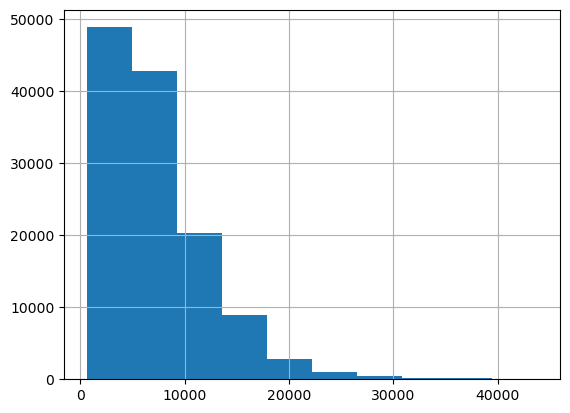

In [ ]:
df_sub['price'].hist()


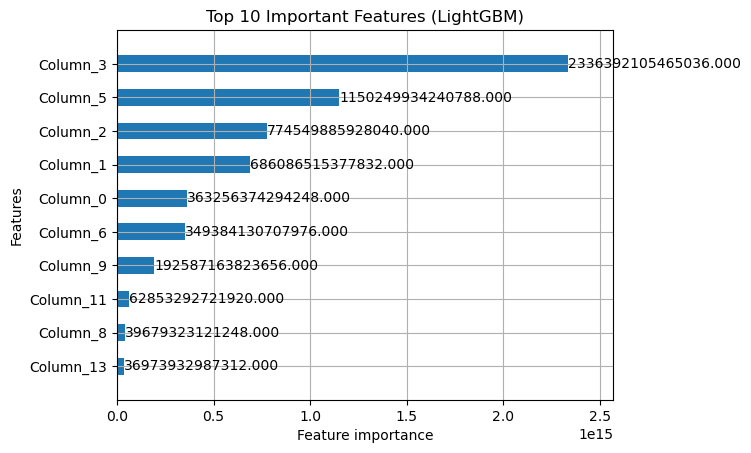

In [ ]:
import lightgbm as lgb

# Assuming lgb_model is your trained model
lgb.plot_importance(lgbm_model, max_num_features=10, importance_type='gain', height=0.5)
plt.title("Top 10 Important Features (LightGBM)")
plt.show()


### Thank you!